# AI For Healthcare
# Exercise 1: CT Reconstruction

## Imports

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale, iradon_sart
import time
from ipywidgets import interact, IntSlider, Layout

## Step 1:
* Create a head phantom or use the Shepp-Logan head phantom. The bright ellipse corresponds to the skull and the structures inside correspond to the various brain tissues and lesions.  
* Calculate the synthetic projection using radon transform (parallel beam geometry) for the head phantom and the geometric images and explain your results.

In [9]:
# get image 
image = shepp_logan_phantom()

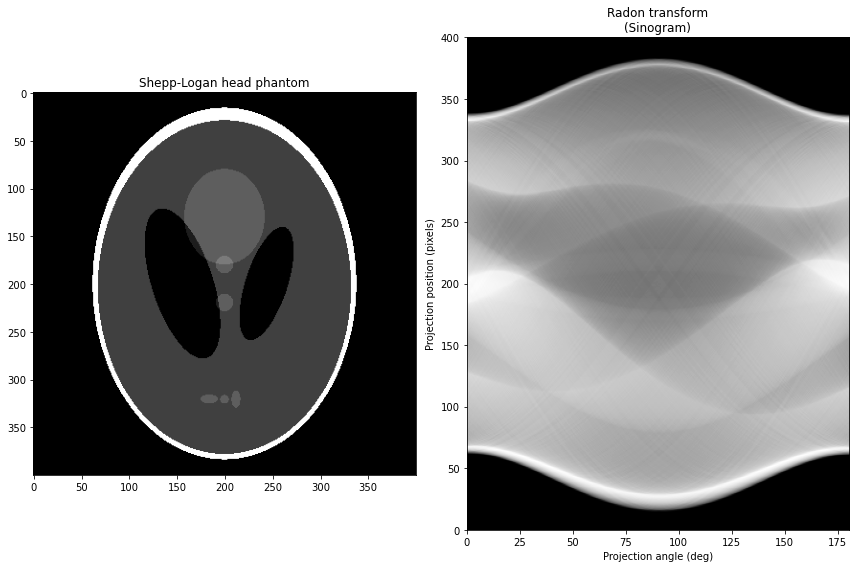

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Generate a plot for the original
ax1.set_title("Shepp-Logan head phantom")
ax1.imshow(image, cmap=plt.cm.Greys_r)

# Generate the sinogram
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

## Step 2: 
* Vary the number of projection angles (18,24,90,... ) and perform a reconstruction for each angle increment. 
* Explain the effect of varying the angles.

In [15]:
def generate_sinogram_as_factor_of_projection_angle(image, figure_idx):
    if figure_idx < 4:
        amount_of_projection_angles = int(0.255 * (figure_idx + 1) * (max(image.shape) // 8))
    else:
        amount_of_projection_angles = int(0.75 * (figure_idx + 1) * (max(image.shape) // 8))
    amount_of_projection_angles_list.append(amount_of_projection_angles)
    # create the sinogram (document how long it took)
    theta = np.linspace(0., 180., amount_of_projection_angles, endpoint=False)
    t1 = time.time()
    sinogram = radon(image, theta=theta)
    radon_time = np.round(time.time() - t1, 2)
    time_list.append(radon_time)
    # create the plot
    dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
    plt.figure(figsize=(12,8))
    plt.imshow(sinogram, cmap=plt.cm.Greys_r,
               extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
               aspect='auto')
    plt.title(
        "Radon transform -# projection angles=" + str(amount_of_projection_angles) + "\n(Sinogram)")
    plt.xlabel("Projection angle (deg)")
    plt.ylabel("Projection position (pixels)")
    plt.imshow(sinogram, cmap=plt.cm.Greys_r,
                          extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
                          aspect='auto')
    plt.show()

In [16]:
PlotAux    = lambda iteration: generate_sinogram_as_factor_of_projection_angle(image, iteration)
iterSlider = IntSlider(min=0, max=8, step=1, value=0, layout=Layout(width='85%'))
interact(PlotAux, iteration=iterSlider)
plt.show()

interactive(children=(IntSlider(value=0, description='iteration', layout=Layout(width='85%'), max=8), Output()…

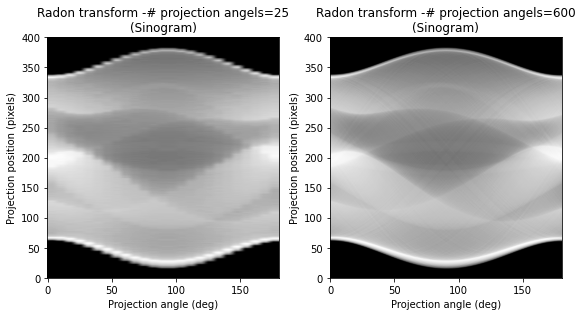

In [17]:

theta_600 = np.linspace(0., 180., 600, endpoint=False)
theta_25 = np.linspace(0., 180., 25, endpoint=False)
sinogram_600 = radon(image, theta=theta_600)
sinogram_25 = radon(image, theta=theta_25)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram_25.shape[0]
ax1.set_title("Radon transform -# projection angels="+str(25)+"\n(Sinogram)")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax1.imshow(sinogram_25, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram_600.shape[0]

ax2.set_title("Radon transform -# projection angels="+str(600)+"\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram_600, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram_600.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

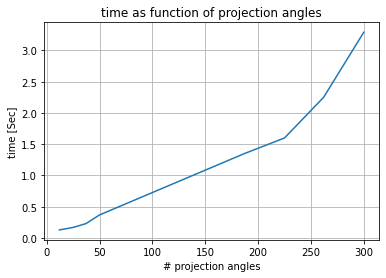

In [19]:
time_list = [] 
amount_of_projection_angles_list = []
for figure_idx in range(0,8):
    # define amount_of_projection_angles
    if figure_idx<4:
        amount_of_projection_angles =  int(0.25*(figure_idx+1)*(max(image.shape)/8))
    else:
        amount_of_projection_angles =  int(0.75*(figure_idx+1)*(max(image.shape)//8))
    amount_of_projection_angles_list.append(amount_of_projection_angles)
    
    # create the sinogram (document how long it took)
    theta = np.linspace(0., 180., amount_of_projection_angles, endpoint=False)
    t1 = time.time()
    sinogram = radon(image, theta=theta)
    radon_time  =  np.round(time.time()-t1,2)
    time_list.append(radon_time)
    
    


# Discuess change in run time according to number of projection angles
plt.figure()
plt.plot(amount_of_projection_angles_list, time_list)
plt.xlabel('# projection angles')
plt.ylabel('time [Sec]')
plt.grid()
plt.title('time as function of projection angles')
plt.show()

## Step 3: 
* Demonstrate the difference of performing back projection and filtered back projection. 

In [20]:
# Generate the sinogram
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)

In [21]:
# Generate the reconstructions
reconstruction_fbp_no_filter = iradon(sinogram, theta=theta, filter_name=None)
reconstruction_fbp_with_filter = iradon(sinogram, theta=theta, filter_name='ramp')

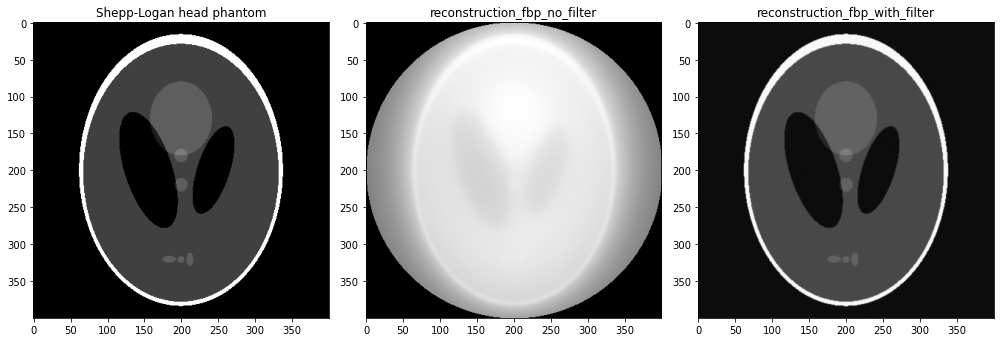

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 14))

# Generate a plot for the original
ax1.set_title("Shepp-Logan head phantom")
ax1.imshow(image, cmap=plt.cm.Greys_r)

# Generate the sinogram
ax2.set_title("reconstruction_fbp_no_filter")
ax2.imshow(reconstruction_fbp_no_filter, cmap=plt.cm.Greys_r)

ax3.set_title("reconstruction_fbp_with_filter")
ax3.imshow(reconstruction_fbp_with_filter, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()

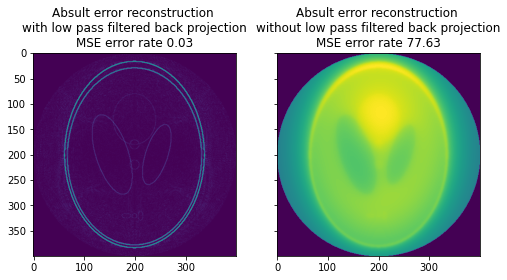

In [23]:
error_no_filter = reconstruction_fbp_no_filter - image
error_with_filter = reconstruction_fbp_with_filter - image

MSE_error_no_filter = np.round(np.sqrt(np.mean(error_no_filter**2)),2)
MSE_error_with_filter = np.round(np.sqrt(np.mean(error_with_filter**2)),2)

error_no_filter_abs = np.abs(error_no_filter)
error_with_filter_abs = np.abs(error_with_filter)

imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Absult error reconstruction \nwith low pass filtered back projection\nMSE error rate "+str(MSE_error_with_filter))
ax1.imshow(error_with_filter_abs)
ax2.set_title("Absult error reconstruction \nwithout low pass filtered back projection\nMSE error rate "+str(MSE_error_no_filter))
ax2.imshow(error_no_filter_abs)
plt.show()

## Step 4: 
* Apply & describe an algebraic  iterative reconstruction technique such as SIRT/ CGLS/ another. 

https://scikit-image.org/docs/dev/auto_examples/transform/plot_radon_transform.html

In [ ]:
# Define starting image
reconstruced_image_init = np.zeros_like(image)
theta = np.linspace(0., 180., max(image.shape), endpoint=False)

# Go
reconstruced_image = reconstruced_image_init.copy()
num_of_iterations = 7
for i in range(num_of_iterations):
    reconstruced_image = iradon_sart(sinogram, theta=theta, image=reconstruced_image)
    
    # print error
    error = reconstruced_image - image
    print(f'iteration {i}, reconstruction error: {np.sqrt(np.mean(error**2)):.3g}')
    
    # plot
    plt.figure()
    plt.imshow(reconstruced_image, cmap=plt.cm.Greys_r)
    plt.tight_layout()
    plt.show()